# Business Analytics Model Development

This notebook presents the development of a business analytics model for classifying safety observations as `Safe` or `Unsafe`. Logistic Regression was selected based on performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_excel("cleaned_and_balanced.xlsx")
df.head()

,Observation,Label
0,Good lifting operations by the deck crew when ...,Safe
1,Observed somebody. not attached his chin strap...,Unsafe
2,Observed slickline crews doing a rig up prepar...,Safe
3,Good TBT conducted in doghouse before laying o...,Safe
4,Good job by team whilst picking up ELSA/RCM as...,Safe


### Text Preprocessing
Lowercase and remove punctuation only.

In [3]:
def simple_clean_text(text):
    text = text.lower()
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)

df['Cleaned_Observation'] = df['Observation'].apply(simple_clean_text)
df[['Observation', 'Cleaned_Observation']].head()

,Observation,Cleaned_Observation
0,Good lifting operations by the deck crew when ...,good lifting operations by the deck crew when ...
1,Observed somebody. not attached his chin strap...,observed somebody not attached his chin strap ...
2,Observed slickline crews doing a rig up prepar...,observed slickline crews doing a rig up prepar...
3,Good TBT conducted in doghouse before laying o...,good tbt conducted in doghouse before laying o...
4,Good job by team whilst picking up ELSA/RCM as...,good job by team whilst picking up elsarcm ass...


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Observation'], df['Label'], test_size=0.2, random_state=42
)

### Model Training
We use a Logistic Regression classifier with TF-IDF vectorization.

In [5]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

### Model Evaluation

Accuracy: 0.9040

Classification Report:
               precision    recall  f1-score   support

        Safe       0.95      0.85      0.90        62
      Unsafe       0.87      0.95      0.91        63

    accuracy                           0.90       125
   macro avg       0.91      0.90      0.90       125
weighted avg       0.91      0.90      0.90       125



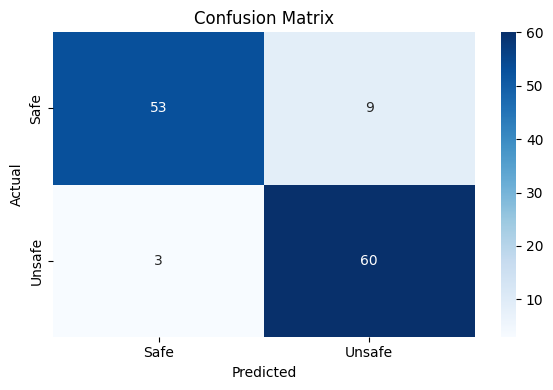

In [6]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Conclusion

The Logistic Regression model achieved an accuracy of **90.4%**, making it the best performer for this task.